In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Text(0.5, 1.0, 'Distribution of Obesity Levels')

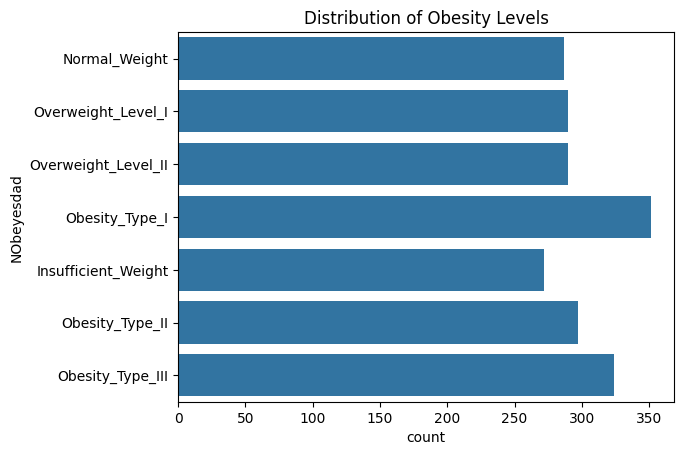

In [3]:
sns.countplot(y='NObeyesdad', data=df)
plt.title('Distribution of Obesity Levels')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
num_col = df.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()
scaled_f = scaler.fit_transform(df[num_col])

s_df = pd.DataFrame(scaled_f, columns=scaler.get_feature_names_out(num_col))

scaled_df = pd.concat([df.drop(columns=num_col), s_df], axis=1)
scaled_df.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


In [7]:
cat_col = scaled_df.select_dtypes(include=['object']).columns.tolist()
cat_col.remove('NObeyesdad')

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_f = encoder.fit_transform(df[cat_col])

e_df = pd.DataFrame(encoded_f, columns=encoder.get_feature_names_out(cat_col))

final_df = pd.concat([scaled_df.drop(columns=cat_col), e_df], axis=1)
final_df.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
final_df['NObeyesdad'] = final_df['NObeyesdad'].astype('category').cat.codes
final_df.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
X = final_df.drop('NObeyesdad', axis=1)
Y = final_df['NObeyesdad']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

### Logistic Regression with One-vs-All
In the One-vs-All approach:

* The algorithm trains a single binary classifier for each class.
* Each classifier learns to distinguish a single class from all the others combined.
* If there are k classes, k classifiers are trained.
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

In [11]:
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [12]:
y_pred_ova = model_ova.predict(X_test)

print('One-vs-All Strategy')
print(f"Accuracy: {np.round(100*accuracy_score(Y_test, y_pred_ova), 2)}%")

One-vs-All Strategy
Accuracy: 76.12%


### Logistic Regression with OvO

In the One-vs-One approach:
* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in $k(k-1)/2$ classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

In [13]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, Y_train)

y_pred_ovo = model_ovo.predict(X_test)

print('One-vs-One Strategy')
print(f"Accuracy: {np.round(100*accuracy_score(Y_test, y_pred_ovo), 2)}%")

One-vs-One Strategy
Accuracy: 92.2%


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [15]:
model_ova1 = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova1.fit(x_train, y_train)

y_pred_ova1 = model_ova1.predict(x_test)

print('One-vs-All Strategy')
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova1), 2)}%")

One-vs-All Strategy
Accuracy: 74.92%


In [16]:
model_ovo1 = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo1.fit(x_train, y_train)

y_pred_ovo1 = model_ovo1.predict(x_test)

print('One-vs-One Strategy')
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo1), 2)}%")

One-vs-One Strategy
Accuracy: 90.85%


<h3>Bar Chart

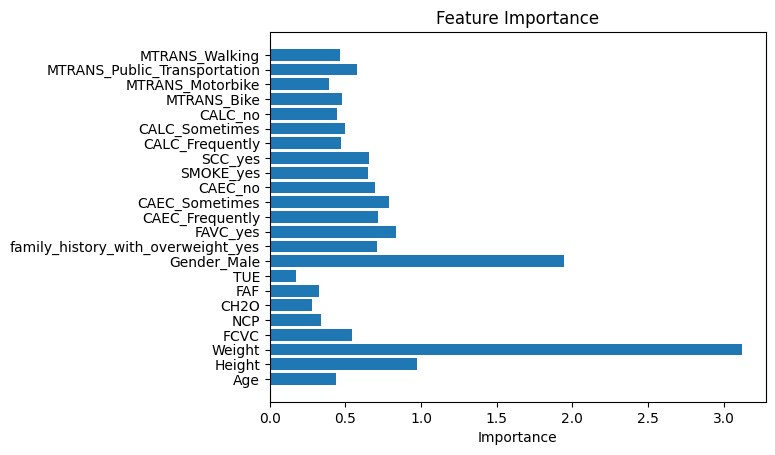

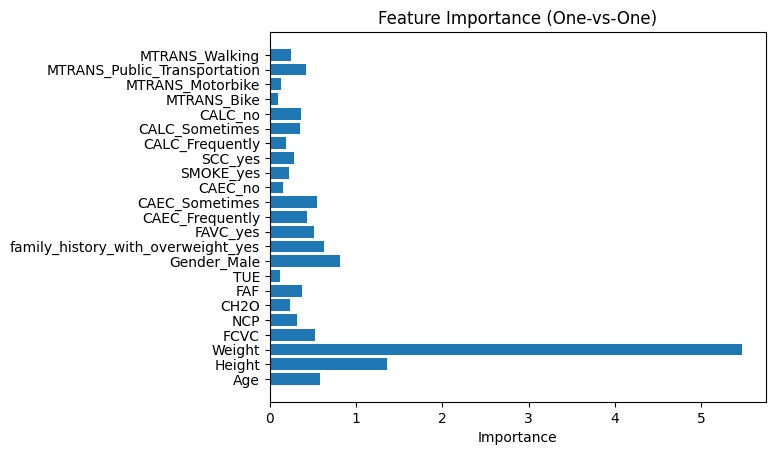

In [ ]:
# For One-vs-All model
feature_imp = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_imp)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

# For One-vs-One model
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

feature_imp = np.mean(np.abs(coefs), axis=0)

plt.barh(X.columns, feature_imp)
plt.title('Feature Importance (One-vs-One)')
plt.xlabel('Importance')
plt.show()

In [ ]:
# Single pipeline function

def obesity_risk_pipeline(data_path, test_size=0.2):
    df = pd.read_csv(data_path)

    continuous_col = df.select_dtypes(include=['float64']).columns.tolist()
    s_sc = StandardScaler()
    scaled_features = s_sc.fit_transform(df[continuous_col])

    continuous_scaled = pd.DataFrame(scaled_features, columns=s_sc.get_feature_names_out(continuous_col))
    scaled_df = pd.concat([df.drop(columns=continuous_col), continuous_scaled], axis=1)

    categorical_col = df.select_dtypes(include=['object']).columns.tolist()
    categorical_col.remove('NObeyesdad')

    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(df[categorical_col])

    categorical_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_col))
    final_df = pd.concat([scaled_df.drop(columns=categorical_col), categorical_encoded], axis=1)

    final_df['NObeyesdad'] = final_df['NObeyesdad'].astype('category').cat.codes

    X = final_df.drop('NObeyesdad', axis=1)
    y = final_df['NObeyesdad']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

obesity_risk_pipeline(file_path)

Accuracy: 0.8794326241134752
